# Decision Tree From Scratch

In [2]:
#importing modules
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#creating a dataframe from reading the csv file
data1=pd.read_csv('hotel_experience.csv')


In [4]:
#displaying first 5 rows of the dataframe
data1.head()

,Unnamed: 0,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,0,32746,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good
1,1,52532,Male,44,business,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good
2,2,62644,Male,64,tourism,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad
3,3,57270,Female,36,academic,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad
4,4,18607,Female,80,tourism,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad


In [5]:
#displaying the last 5 rows of the dataframe
data1.tail()

,Unnamed: 0,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
99995,99995,74699,Female,14,business,Personal Travel,Individual/Couple,2,1,2,2,4,5,4,1,2,4,bad
99996,99996,20343,Male,37,tourism,Group Travel,Group bookings,3,3,3,4,4,4,4,2,4,4,bad
99997,99997,69947,Male,29,academic,Group Travel,Individual/Couple,2,2,2,4,2,2,2,1,4,2,bad
99998,99998,127543,Female,25,academic,Group Travel,Individual/Couple,1,2,2,4,2,5,2,3,3,2,bad
99999,99999,57660,Female,64,tourism,Personal Travel,Individual/Couple,2,3,2,5,3,2,1,3,1,4,bad


In [6]:
#displaying the shape i.e ( rows,columns ) of the dataframe
data1.shape

(100000, 18)

In [7]:
#displaying information about the values stored under various features
#Not null indicates no null values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unnamed: 0                      100000 non-null  int64 
 1   id                              100000 non-null  int64 
 2   Gender                          100000 non-null  object
 3   Age                             100000 non-null  int64 
 4   purpose_of_travel               100000 non-null  object
 5   Type of Travel                  100000 non-null  object
 6   Type Of Booking                 100000 non-null  object
 7   Hotel wifi service              100000 non-null  int64 
 8   Departure/Arrival  convenience  100000 non-null  int64 
 9   Ease of Online booking          100000 non-null  int64 
 10  Hotel location                  100000 non-null  int64 
 11  Food and drink                  100000 non-null  int64 
 12  Stay comfort                   

In [8]:
#checking if any duplicate row present
if(data1.duplicated().sum())==0:
    print('no duplicate values')
    

no duplicate values


In [9]:
#displaying all the different values for each feature
for x in data1.columns:
    print(x+'-')
    print(data1[x].unique())

Unnamed: 0-
[    0     1     2 ... 99997 99998 99999]
id-
[ 32746  52532  62644 ...  69947 127543  57660]
Gender-
['Female' 'Male']
Age-
[32 44 64 36 80 57 29  7 51 33 23 28 22 66 18 49 31 55 15 42 39 11 26 47
 43 53 30 52 24 21 60 35 10 59 45 20 62 37 38 61 27 54 48 41 13 50 34 46
 40  8 68 58 63 19 56 12 70 25 14 16 65 72 77  9 69 17 67 75 73 79 71 74
 76 85 78]
purpose_of_travel-
['academic' 'business' 'tourism' 'personal' 'aviation']
Type of Travel-
['Group Travel' 'Personal Travel']
Type Of Booking-
['Individual/Couple' 'Group bookings' 'Not defined']
Hotel wifi service-
[5 3 2 4 1 0]
Departure/Arrival  convenience-
[5 3 4 2 1 0]
Ease of Online booking-
[2 3 4 1 0 5]
Hotel location-
[5 3 4 2 1 0]
Food and drink-
[5 1 4 2 3 0]
Stay comfort-
[5 3 1 4 2 0]
Common Room entertainment-
[5 4 1 2 3 0]
Checkin/Checkout service-
[1 2 3 4 5 0]
Other service-
[2 4 5 3 1 0]
Cleanliness-
[5 1 2 4 3 0]
overall experience-
['good' 'bad']


In [10]:
#describing properties like mean,min,max values 
data1.describe()

,Unnamed: 0,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,64913.421530,39.366210,2.729420,3.061710,2.756860,2.977420,3.201540,3.438900,3.358360,3.303730,3.640560,3.285910
std,28867.657797,37469.018138,15.122459,1.327962,1.524823,1.398951,1.276803,1.329879,1.319433,1.333123,1.265509,1.176213,1.312449
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,32513.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,49999.500000,64794.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,74999.250000,97384.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,99999.000000,129879.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
#dropping unnecessary features
data1=data1.drop(data1.index[data1['Type Of Booking']=='Not defined'].tolist())
data1=data1.drop(data1.columns[0],axis='columns')
data1=data1.drop(data1.columns[0],axis='columns')
data1.head()

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good
1,Male,44,business,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good
2,Male,64,tourism,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad
3,Female,36,academic,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad
4,Female,80,tourism,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad


In [12]:
#displaying info of the refined dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92789 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          92789 non-null  object
 1   Age                             92789 non-null  int64 
 2   purpose_of_travel               92789 non-null  object
 3   Type of Travel                  92789 non-null  object
 4   Type Of Booking                 92789 non-null  object
 5   Hotel wifi service              92789 non-null  int64 
 6   Departure/Arrival  convenience  92789 non-null  int64 
 7   Ease of Online booking          92789 non-null  int64 
 8   Hotel location                  92789 non-null  int64 
 9   Food and drink                  92789 non-null  int64 
 10  Stay comfort                    92789 non-null  int64 
 11  Common Room entertainment       92789 non-null  int64 
 12  Checkin/Checkout service        92789 non-null

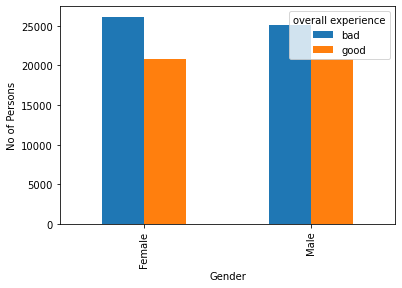

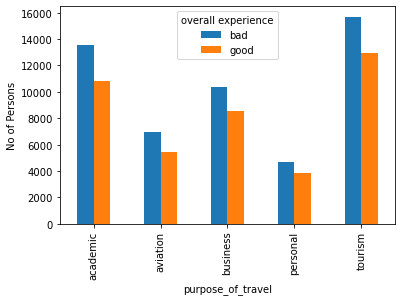

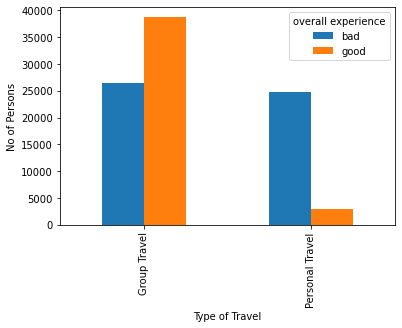

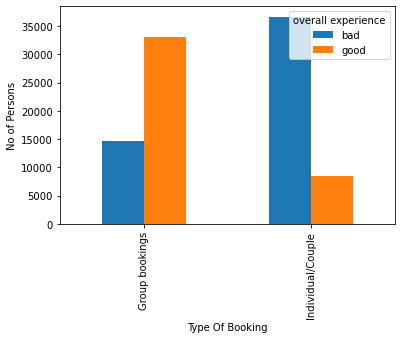

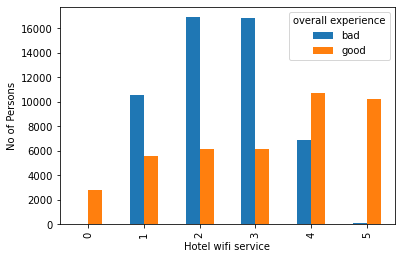

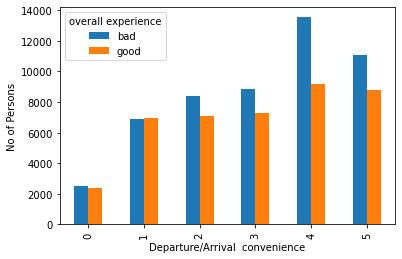

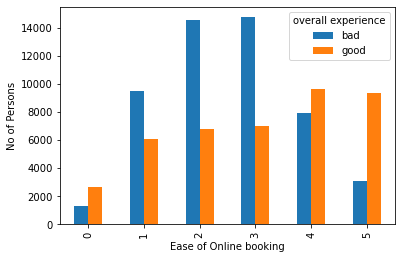

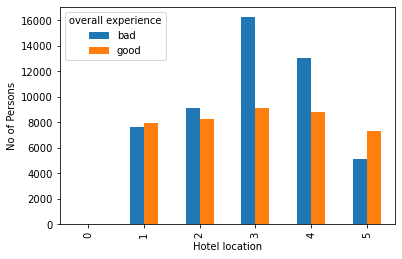

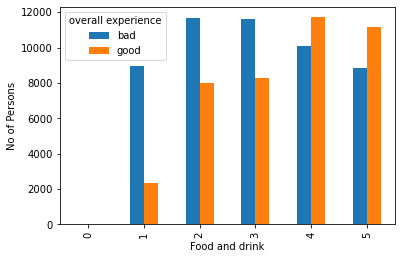

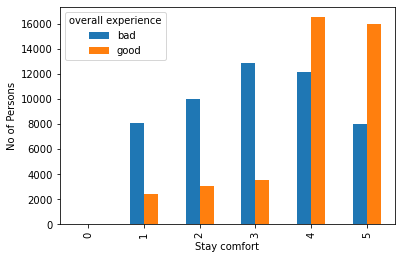

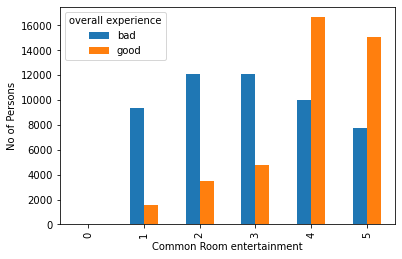

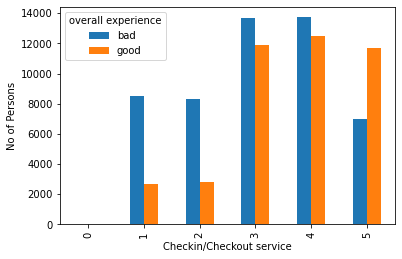

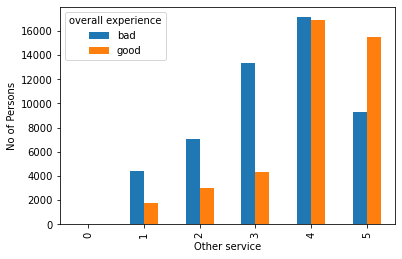

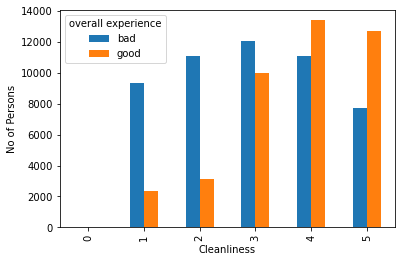

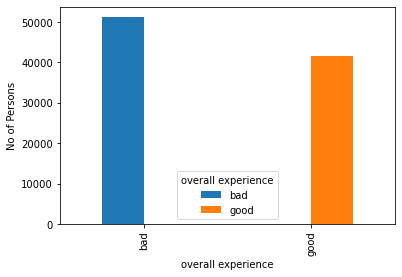

In [13]:
#plotting bar grophs of all the catagorical features against their count 
i=0
while i<16:
    if i==1:
        i=i+1
        continue
    data1.groupby([data1.columns[-1],data1.columns[i]])[data1.columns[i]].count().unstack(0).plot.bar(ylabel="No of Persons")
    i=i+1
        
    
        
    
        
    

<AxesSubplot:xlabel='Age', ylabel='No of Persons'>

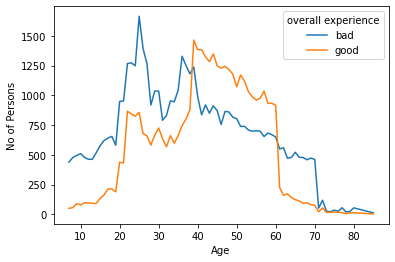

In [14]:
#plotting graph of age(grouped by target class) vs count 
data1.groupby([data1.columns[-1],data1.columns[1]])[data1.columns[1]].count().unstack(0).plot(ylabel="No of Persons")

In [23]:
#Decision Tree Implementation from scratch

#dividing dataset into training and testing set

train=data1.sample(frac=0.75)
test=data1.drop(train.index)

#class begins

class decision_tree:
    
    #init function to initiakize class variables
    
    def __init__(self,x,y):
        self.train=x
        self.test=y
   
    #node_finder function finds the split condition and divided datasets    
    
    def node_finder(self):
       
       #leaf node conditions
        
        if len(self.data.columns)==1:
            if (len(self.data[self.data[self.data.columns[-1]]=='good'].index)>len(self.data[self.data[self.data.columns[-1]]=='bad'].index)):
                self.lm=[['Leaf','good']]
            else:
                self.lm=[['Leaf','bad']]
        elif (len(self.data[self.data[self.data.columns[-1]]=='good'].index)==len(self.data.index)):
            self.lm=[['Leaf','good']]
        
        elif (len(self.data[self.data[self.data.columns[-1]]=='bad'].index)==len(self.data.index)):
            self.lm=[['Leaf','bad']]    
        
        #creation of other nodes
        
        else:
            p3=5
            for x in self.data.columns:
                if x =='overall experience':
                    pass
                else:
                    k=[]
                    z=self.data[x].unique()
                    for c in z:
                        a=len(self.data[(self.data[x]==c)&(self.data[self.data.columns[-1]]=='good')].index)
                        b=len(self.data[(self.data[x]==c)].index)
                        k.append(a/b)
                    s=zip(k,z)
                    z=list([d for _,d in sorted(s)])
                    k=sorted(k)
                    d=0
                    for p8 in k:
                        if p8>0.5:
                            break
                        d=d+1   
                    if (d==0):
                        w1=z[:1]
                        w2=z[1:]
                    elif d==len(z):
                        w1=z[:d-1]
                        w2=z[d-1:]
                    else:
                        w1=z[:d]
                        w2=z[d:]
                    for e1 in w1:
                        c1=self.data[self.data[x]==e1]
                        if(e1==w1[0]):
                            d1=c1
                        else:
                            d1=pd.concat([d1,c1])         
                    for e2 in w2:
                        c2=self.data[self.data[x]==e2]
                        if(e2==w2[0]):
                            d2=c2
                        else:
                            d2=pd.concat([d2,c2])
                    
                    #using gini index as finding criteria        
                    
                    p1=len(d1.index)/len(self.data.index)    
                    p2=len(d2.index)/len(self.data.index)
                    g1=len(d1[d1[self.data.columns[-1]]=='good'].index)/len(d1.index)
                    g2=len(d2[d2[self.data.columns[-1]]=='good'].index)/len(d2.index)
                    G1=p1*(1-(g1**2)-((1-g1)**2))+p2*(1-(g2**2)-((1-g2)**2))
                    if G1<p3:
                        s2=x
                        w3=w1
                        p3=G1
                        d6=d1
                        d9=d2
            
            #dropped the feature which was used for split
           
            d6=d6.drop([s2],axis=1)
            d9=d9.drop([s2],axis=1)
            
            #dropped feature with just one remaining unique value
            
            k0=d6.columns
            for x in k0:
                if x=='overall experience':
                    pass
                elif (len( d6[x].unique() )==1):
                    d6=d6.drop([x],axis=1)
                 
            k2=d9.columns
            for x in k2:
                if x=='overall experience':
                    pass
                elif (len( d9[x].unique() )==1):
                    d9=d9.drop([x],axis=1)
            self.lm=[[s2,w3],d6,d9]
    
    #trainf function to find all the nodes and store them in a list for use in predictreport       
           
    def trainf(self):
        self.list1=[]
        t=[[self.train]]
        for x in t:
            self.data=x[0]
            self.node_finder()
            self.list1.append(self.lm[0])
            if len(t)==1:
                pass
            else:    
                self.list1[x[1]].append(len(self.list1)-1)
            if self.lm[0][0]=='Leaf':
                pass
            else:
                t.append([self.lm[1],len(self.list1)-1])
                t.append([self.lm[2],len(self.list1)-1])   
  
     #predictreport fuction to calculate 
   
    def predictreport(self):
        self.trainf()
        j=8
        k=0
        k1=0
        for x2 in self.test.index:
            testrow=self.test.loc[x2,:]
            q1=self.list1[0]
            while j!=5:
                if(testrow[q1[0]] in q1[1]):
                    q1=self.list1[q1[2]]
                    if q1[0]=='Leaf':
                        if testrow[-1]==q1[1]:
                            k=k+1
                            if testrow[-1]=='good':
                                k1=k1+1
                        break
                else:
                    q1=self.list1[q1[3]]
                    if q1[0]=='Leaf':
                        if testrow[-1]==q1[1]:
                            k=k+1
                            if testrow[-1]=='good':
                                k1=k1+1
                        break
        dent=len(self.test.index)
        deng=len(self.test[self.test[self.test.columns[-1]]=='good'].index)
        self.u1=k1/(k1+((dent-deng)-(k-k1)))
        self.u2=(k-k1)/((k-k1)+(deng-k1))
        self.v1=(k1)/deng
        self.v2=(k-k1)/(dent-deng)
        self.Display() 
    
    #Display function to display the prediction report in tabular form
    
    def Display(self):
        heads=['Precision','Recall','F1-Score']
        labels=['good','bad','mean']
        z1=(2*(self.u1*self.v1))/(self.u1+self.v1)
        z2=(2*(self.u2*self.v2))/(self.u2+self.v2)
        scores=[[self.u1,self.v1,z1],[self.u2,self.v2,z2],[(self.u1+self.u2)/2,(self.v1+self.v2)/2,(z1+z2)/2]]
        print(pd.DataFrame(scores,labels,heads))
        
          
                             

In [24]:
print('Precision= total no of class \'a\' items correctly identified/total no of items identified as class \'a\'')

print('\nRecall=total no of class \'a\' items correctly identified/total no of class \'a\' items')

print('\nF1 score=Harmonic mean of precision and recall\n\n')

#object creation

dt=decision_tree(train,test)
dt.predictreport()
                      

Precision= total no of class 'a' items correctly identified/total no of items identified as class 'a'

Recall=total no of class 'a' items correctly identified/total no of class 'a' items

F1 score=Harmonic mean of precision and recall


      Precision    Recall  F1-Score
good   0.914921  0.897781  0.906270
bad    0.918047  0.932046  0.924993
mean   0.916484  0.914913  0.915631


# ML using Sklearn

In [25]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [26]:
#Convering Categorical features into integral values
datas=data1
k=LabelEncoder()
for x in datas.columns:
    if type(datas[x].unique()[0])==str:
        datas[x]=k.fit_transform(datas[x])
datas.head()  

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,0,32,0,0,1,5,5,2,5,5,5,5,1,2,5,1
1,1,44,2,0,0,3,3,3,3,5,3,4,2,4,1,1
2,1,64,4,1,1,3,5,3,3,1,1,1,3,5,1,0
3,0,36,0,0,0,2,4,4,4,4,3,2,1,2,2,0
4,0,80,4,0,1,2,4,2,5,4,4,4,2,2,4,0


In [27]:
#displaying information of the modified dataset
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92789 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          92789 non-null  int32
 1   Age                             92789 non-null  int64
 2   purpose_of_travel               92789 non-null  int32
 3   Type of Travel                  92789 non-null  int32
 4   Type Of Booking                 92789 non-null  int32
 5   Hotel wifi service              92789 non-null  int64
 6   Departure/Arrival  convenience  92789 non-null  int64
 7   Ease of Online booking          92789 non-null  int64
 8   Hotel location                  92789 non-null  int64
 9   Food and drink                  92789 non-null  int64
 10  Stay comfort                    92789 non-null  int64
 11  Common Room entertainment       92789 non-null  int64
 12  Checkin/Checkout service        92789 non-null  int64
 13  O

In [28]:
#splitting the dataset into training set,testing set and validating set
y=datas['overall experience']
x=datas.drop('overall experience',axis=1)
train,test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
train,cv,y_train,y_cv=train_test_split(train,y_train,test_size=0.25,random_state=1)
#using standard scaler to normalise the dataset
sc=StandardScaler()
train=sc.fit_transform(train)
test=sc.transform(test)
cv=sc.transform(cv)


MODEL-1

In [29]:
#Decision tree classifier with gini index criterion
classifier0=DecisionTreeClassifier()
classifier0.fit(train,y_train)
print('Depth_of_tree-')
print(classifier0.get_depth())
print('No of leaves-')
print(classifier0.get_n_leaves())
pred0=classifier0.predict(cv)






Depth_of_tree-
34
No of leaves-
4167


MODEL-2

In [30]:
#Decision tree classifier with entropy criterion
classifier1=DecisionTreeClassifier(criterion='entropy')
classifier1.fit(train,y_train)
print('Depth_of_tree-')
print(classifier1.get_depth())
print('No of leaves-')
print(classifier1.get_n_leaves())
pred1=classifier1.predict(cv)


Depth_of_tree-
35
No of leaves-
4006


MODEL-3

In [31]:
#Random Forest Classifier
classifier2=RandomForestClassifier()
classifier2.fit(train,y_train)
pred2=classifier2.predict(cv)

In [32]:
#Using validation set to select best model
print('\t\t\t  MODEL-1\n')
print(classification_report(y_cv,pred0))
print('\t\t\t  MODEL-2\n')
print(classification_report(y_cv,pred1))
print('\t\t\t  MODEL-3\n')
print(classification_report(y_cv,pred2))

			  MODEL-1

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10170
           1       0.91      0.92      0.92      8388

    accuracy                           0.92     18558
   macro avg       0.92      0.92      0.92     18558
weighted avg       0.92      0.92      0.92     18558

			  MODEL-2

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10170
           1       0.91      0.92      0.92      8388

    accuracy                           0.93     18558
   macro avg       0.93      0.93      0.93     18558
weighted avg       0.93      0.93      0.93     18558

			  MODEL-3

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10170
           1       0.95      0.93      0.94      8388

    accuracy                           0.95     18558
   macro avg       0.95      0.95      0.95     18558
weighted avg       0.95      0.9

Hence MODEL-3 has best performance over the validation set

In [34]:
#Using MODEL-3 to predict outcomes for the test dataset
print('\t\t\t  TEST RESULTS-\n')
fpred=classifier2.predict(test)
print(classification_report(y_test,fpred))

			  TEST RESULTS-

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10299
           1       0.95      0.93      0.94      8259

    accuracy                           0.95     18558
   macro avg       0.95      0.95      0.95     18558
weighted avg       0.95      0.95      0.95     18558

